## Thief in the Treasure Room

In this problem, a thief broke into the treasure room in the king's palace. There are a thousand pieces of gold and jewels in the treasure room, and the thief took with him a bag that can hold a maximum of twenty items. 

The problem facing the thief is to maximize the total value of the items to be stolen (which he somehow knows) while minimizing the total weight of the loot to facilitate his escape.

It is a loose, multi-objective adaptation of the [Knapsack  problem](https://en.wikipedia.org/wiki/Knapsack_problem).

In [1]:
import mosa
from time import time
from numpy import random
%matplotlib inline

In [2]:
random.seed(0)

For the purpose of illustrating this optimization problem where the amount of solution elements can vary, both the values of the pieces, in kingdom currency, and their weights, in kg, are fictitious and generated by the the *generate_data* function below.

In [3]:
def generate_data():
    random.seed(0)
    weight=random.uniform(0.5,5.0,1000)
    weight.sort()
    r=random.uniform(100.0,300.0,1000)
    value=weight*r
    random.seed()
    
    return weight,value

Weight,Value=generate_data()

### Translating the Thief in the Treasure Room problem into Python code

A Python function *fobj* implements the problem. A trial solution to the problem is taken as its only argument. The solution is a Python dictionary with a single key, "Item", which contains a list of the items stolen by the thief.

Objectives are simply the sum of the values and weights of stolen items. 

Notice that maximizing the total item value is equivalent of minimizing its negative.

In [4]:
def fobj(solution):
    value=Value[solution["Item"]]
    weight=Weight[solution["Item"]]
        
    return -sum(value),sum(weight)

### Initialization

An *Anneal* object is created. Then attributes of the *opt* object are set to control the optimization process.

In [5]:
opt=mosa.Anneal()

print("MOSA version: %s" % mosa.__version__)

--------------------------------------------------
    MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA)    
--------------------------------------------------
         Developed by Prof. Roberto Gomes         
   Universidade Federal do ABC (UFABC), Brazil    


MOSA version: 0.4.9


In [6]:
opt.population={"Item":[i for i in range(1000)]}
opt.initial_temperature=1.0
opt.number_of_temperatures=100
opt.number_of_iterations=2000
opt.objective_weights=[(Value.max()-Value.min()),(Weight.max()-Weight.min())]
opt.archive_size=1000
opt.maximum_archive_rejections=1000
opt.no_repeated_elements={"Item":True}
opt.sort_solution_elements={"Item":True}
opt.mc_step_size={"Item":50}

In [7]:
opt.verbose=True

In each Monte Carlo iteration, one of two possible trial moves is selected. The first, which occurs with a probability of 70%, consists of replacing an element in the solution with an element taken from the population. The second type of trial move, which occurs with a 30% probability, involves adding an element to the solution (15% probability) or removing an element from the solution (15% probability), therefore changing the amount of solution elements, if accepted.

The initial number of solution elements is five and the maximum number is twenty. The number of solution elements can vary between one and twenty.

In [8]:
opt.change_value_move={"Item":0.7}
opt.insert_or_delete_move={"Item":0.3}
opt.number_of_solution_elements={"Item":5}
opt.maximum_number_of_solution_elements={"Item":20}

### Run

The optimization process actually occurs when the *evolve* method is called with *fobj* as argument.

In [9]:
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
No checkpoint file!
Done!
Trying to load the archive from file archive.json...
File archive.json not found! Initializing an empty archive...
Done!
------
Keys in the population/solution dictionaries:
    ['Item']:
        Number of elements in the solution: 5
        Discrete sample space
        Number of elements in the population: 1000
        Elements cannot be repeated in the solution: True
        Selection weight of this key: 1.000000
        Weight of 'change value' trial move: 0.700000
        Weight of 'insert or delete' trial move: 0.300000
        Maximum number of solution elements: 20
        Solution sorted after trial move: True
        Maximum step size to select an element in the population, using a triangular distribution: 50
------
Initializing with a random solution from scratch...
Done!
------
TEMPERATURE: 1.000000
    Number of accepted moves: 1605.
    Fraction of accepted moves

### Output

Below we print the content of the solution archive, we also print some basic statistics, and then plot the total 
value of stolen items vs. the total weight.

In [10]:
opt.printx()

===
Solutions:
1) {'Item': [757]}
2) {'Item': [802]}
3) {'Item': [892]}
4) {'Item': [841]}
5) {'Item': [928]}
6) {'Item': [765, 809]}
7) {'Item': [242]}
8) {'Item': [174]}
9) {'Item': [104]}
10) {'Item': [104, 122]}
11) {'Item': [104, 178]}
12) {'Item': [220]}
13) {'Item': [220, 222]}
14) {'Item': [332]}
15) {'Item': [308, 329]}
16) {'Item': [317]}
17) {'Item': [372]}
18) {'Item': [393]}
19) {'Item': [404]}
20) {'Item': [429]}
21) {'Item': [314, 332, 366]}
22) {'Item': [300, 319, 332, 354]}
23) {'Item': [460, 473]}
24) {'Item': [551]}
25) {'Item': [604]}
26) {'Item': [583]}
27) {'Item': [531]}
28) {'Item': [588]}
29) {'Item': [831, 860, 897, 970]}
30) {'Item': [854, 858, 884]}
31) {'Item': [841, 943, 955]}
32) {'Item': [968]}
33) {'Item': [3]}
34) {'Item': [265]}
35) {'Item': [47]}
36) {'Item': [47, 841]}
37) {'Item': [68, 841]}
38) {'Item': [126, 841]}
39) {'Item': [33]}
40) {'Item': [33, 47]}
41) {'Item': [33, 126]}
42) {'Item': [28]}
43) {'Item': [32, 88]}
44) {'Item': [77]}
45) {'I

In [11]:
opt.printstats()

===
Objective function 0: 
    Minimum: -9089.139460
    Maximum: -109.825034
    Average: -2882.234533
===
Objective function 1: 
    Minimum: 0.502457
    Maximum: 40.176564
    Average: 11.072105


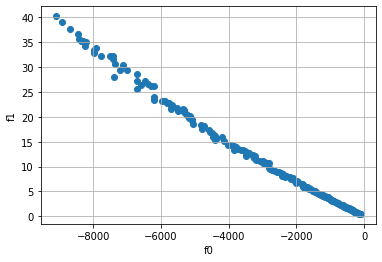

In [12]:
opt.plotfront()

### Removing dominated solutions

Some dominated solutions may still remain and should be removed from the archive by calling the *prunedominated* method.

In [13]:
start=time()
pruned=opt.prunedominated()
opt.printx(pruned)
end=time()
print("   Elapsed time: %f s" % (end-start))

===
Solutions:
1) {'Item': [757]}
2) {'Item': [802]}
3) {'Item': [892]}
4) {'Item': [841]}
5) {'Item': [928]}
6) {'Item': [242]}
7) {'Item': [174]}
8) {'Item': [104]}
9) {'Item': [104, 122]}
10) {'Item': [104, 178]}
11) {'Item': [220]}
12) {'Item': [220, 222]}
13) {'Item': [332]}
14) {'Item': [308, 329]}
15) {'Item': [317]}
16) {'Item': [372]}
17) {'Item': [393]}
18) {'Item': [404]}
19) {'Item': [460, 473]}
20) {'Item': [551]}
21) {'Item': [604]}
22) {'Item': [583]}
23) {'Item': [531]}
24) {'Item': [588]}
25) {'Item': [854, 858, 884]}
26) {'Item': [968]}
27) {'Item': [3]}
28) {'Item': [265]}
29) {'Item': [47]}
30) {'Item': [47, 841]}
31) {'Item': [68, 841]}
32) {'Item': [126, 841]}
33) {'Item': [33]}
34) {'Item': [33, 47]}
35) {'Item': [33, 126]}
36) {'Item': [28]}
37) {'Item': [32, 88]}
38) {'Item': [77]}
39) {'Item': [222]}
40) {'Item': [5]}
41) {'Item': [494]}
42) {'Item': [583, 600, 603]}
43) {'Item': [709]}
44) {'Item': [580, 631, 644, 645, 646, 648, 655]}
45) {'Item': [441, 483, 

In [14]:
opt.printstats(pruned)

===
Objective function 0: 
    Minimum: -9089.139460
    Maximum: -109.825034
    Average: -2439.051910
===
Objective function 1: 
    Minimum: 0.502457
    Maximum: 40.176564
    Average: 9.227098


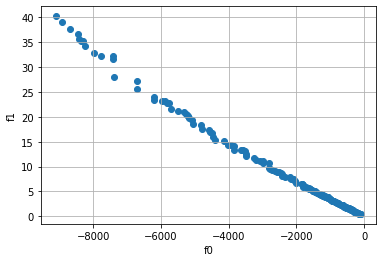

In [15]:
opt.plotfront(pruned)

### Decision making

Many solutions (i.e., different possible sets of stolen pieces) still remain in the archive and it is hard for the thief to choose one or two out of them.

In order to reduce the solution set to something a human being is able to deal with, first, the *trimx* method is used to select the sets of stolen pieces that are below a maximum weight, in this case, 20 kg.

In [16]:
trimmed=opt.trimx(xset=pruned,thresholds=[None,20])
opt.printx(trimmed)

===
Solutions:
1) {'Item': [757]}
2) {'Item': [802]}
3) {'Item': [892]}
4) {'Item': [841]}
5) {'Item': [928]}
6) {'Item': [242]}
7) {'Item': [174]}
8) {'Item': [104]}
9) {'Item': [104, 122]}
10) {'Item': [104, 178]}
11) {'Item': [220]}
12) {'Item': [220, 222]}
13) {'Item': [332]}
14) {'Item': [308, 329]}
15) {'Item': [317]}
16) {'Item': [372]}
17) {'Item': [393]}
18) {'Item': [404]}
19) {'Item': [460, 473]}
20) {'Item': [551]}
21) {'Item': [604]}
22) {'Item': [583]}
23) {'Item': [531]}
24) {'Item': [588]}
25) {'Item': [854, 858, 884]}
26) {'Item': [968]}
27) {'Item': [3]}
28) {'Item': [265]}
29) {'Item': [47]}
30) {'Item': [47, 841]}
31) {'Item': [68, 841]}
32) {'Item': [126, 841]}
33) {'Item': [33]}
34) {'Item': [33, 47]}
35) {'Item': [33, 126]}
36) {'Item': [28]}
37) {'Item': [32, 88]}
38) {'Item': [77]}
39) {'Item': [222]}
40) {'Item': [5]}
41) {'Item': [494]}
42) {'Item': [583, 600, 603]}
43) {'Item': [709]}
44) {'Item': [508]}
45) {'Item': [23, 122]}
46) {'Item': [9, 122]}
47) {'I

Finally, we narrowed down the options even further by calling the *reducex* method. The ten solutions that contain the most valuable sets of pieces in the king's treasury, whose total weight is less than 20 kg, are presented.

In [17]:
sol=opt.reducex(xset=trimmed,index=0,nel=10)
opt.printx(sol)

===
Solutions:
1) {'Item': [671, 720, 782, 815, 833]}
2) {'Item': [468, 680, 838, 867, 870]}
3) {'Item': [90, 405, 531, 627, 892, 906]}
4) {'Item': [819, 893, 928, 940]}
5) {'Item': [756, 819, 928, 940]}
6) {'Item': [717, 826, 916, 941]}
7) {'Item': [36, 345, 892, 968, 978]}
8) {'Item': [18, 349, 893, 928, 941]}
9) {'Item': [18, 349, 761, 928, 941]}
10) {'Item': [631, 761, 765, 825]}
Values:
1) [-5159.151283863433, 19.759457974765237]
2) [-5090.651368260926, 19.346142255988124]
3) [-5052.49750962812, 18.515513925252776]
4) [-4824.189617783785, 18.27332387226538]
5) [-4787.797154161649, 17.563441794196127]
6) [-4583.452880469854, 17.405954559446137]
7) [-4543.58469389488, 17.009087684204577]
8) [-4492.7551920185, 16.678877160862946]
9) [-4465.547346274176, 15.994301169884666]
10) [-4390.614741394639, 15.362382149475163]
